In [1]:
# Ensure compatibility
from __future__ import absolute_import, division, print_function

# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import TensorFlow and Keras packages
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.15.0


In [2]:
# from google.colab import files

# # Importing the dataset
# uploaded = files.upload()  # Allows to upload files to Google Colab

# import io
# filename = list(uploaded.keys())[0]  # Gets the filename of the uploaded file

from google.colab import drive
drive.mount('/content/drive')

# data1 = pd.read_csv()  # Reads the uploaded file into a DataFrame


Mounted at /content/drive


In [3]:
data1 = pd.read_csv("/content/drive/MyDrive/DSO 522/Project 5/joined_data.csv")

In [4]:
!pip install -q -U keras-tuner

import keras_tuner as kt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [5]:
data1.head()

,transaction_ID,transaction_date,Year_Birth,Marital_Status,MntFruits,Education,Income,children_categorical,teen_categorical,income_standardize,maritalstat_categorical,spender_class
0,6653,7/30/12,1970,Married,0,PhD,55158,1,1,0.332539,1,0
1,6181,7/31/12,1950,Not Married,21,2n Cycle,52203,0,0,0.314147,0,0
2,4692,8/1/12,1976,Married,0,Graduation,7500,1,0,0.035913,1,0
3,2611,8/1/12,1959,Not Married,55,Master,82576,0,0,0.503190,0,1
4,10001,8/1/12,1985,Not Married,17,2n Cycle,7500,1,0,0.035913,0,0


In [6]:
data1.tail()

,transaction_ID,transaction_date,Year_Birth,Marital_Status,MntFruits,Education,Income,children_categorical,teen_categorical,income_standardize,maritalstat_categorical,spender_class
2210,1371,6/28/14,1976,Not Married,164,Graduation,79941,0,0,0.486789,0,1
2211,6722,6/28/14,1954,Married,28,PhD,70421,0,1,0.427536,1,1
2212,8093,6/28/14,1969,Married,8,Master,79734,0,0,0.485501,1,0
2213,7300,6/29/14,1952,Not Married,4,Graduation,69142,0,1,0.419576,0,0
2214,453,6/29/14,1956,Not Married,0,PhD,35340,1,1,0.209190,0,0


In [7]:
data1nparray = data1.values

In [8]:
# Define independent variables

TrainData   = data1nparray[:, [7, 8, 9, 10]]
# Define dependent variable

TrainLabels = data1nparray[:, [11]]

In [9]:
TrainDataFloat = TrainData.astype(float)

In [10]:
TrainDataFloat

array([[1.        , 1.        , 0.33253873, 1.        ],
       [0.        , 0.        , 0.31414665, 0.        ],
       [1.        , 0.        , 0.03591279, 1.        ],
       ...,
       [0.        , 0.        , 0.48550107, 1.        ],
       [0.        , 1.        , 0.41957589, 0.        ],
       [1.        , 1.        , 0.20919044, 0.        ]])

In [11]:
TrainLabelsInt = TrainLabels.astype(int)

In [12]:
TrainLabelsInt

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [13]:
TrainDataFloat.shape

(2215, 4)

In [14]:
TrainLabelsInt.shape

(2215, 1)

In [15]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(4,)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [16]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=25,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

In [17]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [18]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [19]:
tuner.search(TrainDataFloat, TrainLabelsInt, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 00m 05s]
val_accuracy: 0.8848758339881897

Best val_accuracy So Far: 0.8893905282020569
Total elapsed time: 00h 01m 53s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 224 and the optimal learning rate for the optimizer
is 0.01.



In [82]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers

# Import all optimizers from TensorFlow
adam = optimizers.Adam
rmsprop = optimizers.RMSprop
adamw = optimizers.AdamW
adadelta = optimizers.Adadelta
adagrad = optimizers.Adagrad
adamax = optimizers.Adamax
nadam = optimizers.Nadam
ftrl = optimizers.Ftrl

# Define the list of optimizers
all_optimizers = [adam, rmsprop, adamw, adadelta, adagrad, adamax, nadam, ftrl]

# Now you can use `all_optimizers` list in your code


In [88]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 5.2 MB/s eta 0:00:00


In [93]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers

class AdamW(optimizers.Adam):
    def __init__(self, learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, weight_decay=0.01, **kwargs):
        super().__init__(learning_rate, beta_1, beta_2, epsilon, **kwargs)
        self.weight_decay = weight_decay

    def _resource_apply_dense(self, grad, var):
        var_device, var_dtype = var.device, var.dtype.base_dtype
        lr_t = self.lr
        wd_t = self.weight_decay
        m = self.get_slot(var, 'm')
        v = self.get_slot(var, 'v')
        beta_1_t = self._get_hyper('beta_1', var_dtype)
        beta_2_t = self._get_hyper('beta_2', var_dtype)
        epsilon_t = tf.convert_to_tensor(self.epsilon, var_dtype)
        lr = (lr_t * tf.sqrt(1 - beta_2_t ** self.iterations) / (1 - beta_1_t ** self.iterations))
        wd = wd_t * lr_t
        m_t = m.assign(beta_1_t * m + (1. - beta_1_t) * grad, use_locking=self._use_locking)
        m_corr_t = m_t / (1. - beta_1_t ** self.iterations)
        v_t = v.assign(beta_2_t * v + (1. - beta_2_t) * tf.square(grad), use_locking=self._use_locking)
        v_corr_t = v_t / (1. - beta_2_t ** self.iterations)
        var_update = var.assign_sub(lr * (m_corr_t / (tf.sqrt(v_corr_t) + epsilon_t) + wd * var),
                                    use_locking=self._use_locking)
        return tf.group(*[var_update, m_t, v_t])

# Register AdamW optimizer
keras.utils.get_custom_objects().update({'AdamW': AdamW})


In [95]:
import tensorflow as tf
from tensorflow import keras

# Define various configurations
activation_functions = ['relu', 'softmax', 'sigmoid', 'tanh']
epochs_list = [15, 20, 25, 30]
layers_configurations = {
    2: [16, 2],
    3: [32, 16, 2],
    4: [32, 16, 8, 2],
    5: [32, 16, 8, 4, 2]
}
optimizer_algorithms = ['adam', 'rmsprop', 'adadelta', 'adamax', 'nadam', 'ftrl']
loss_functions = ['sparse_categorical_crossentropy']

# Store best model performance
best_accuracy = 0
best_configuration = {}

# Iterate over each combination of configurations
for activation in activation_functions:
    for epochs in epochs_list:
        for num_layers, nodes_configuration in layers_configurations.items():
            for optimizer in set(optimizer_algorithms):  # Ensure unique optimizers
                for loss in loss_functions:
                    # Build the model
                    model = keras.Sequential()
                    # Add layers based on the configuration
                    for nodes in nodes_configuration[:-1]:
                        model.add(keras.layers.Dense(nodes, activation=activation))
                    # Add output layer
                    model.add(keras.layers.Dense(nodes_configuration[-1], activation='softmax'))

                    # Compile the model
                    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

                    # Fit the model with a validation split
                    history = model.fit(TrainDataFloat, TrainLabelsInt, epochs=epochs, validation_split=0.2, verbose=0)

                    # Check the validation accuracy of the last epoch
                    val_accuracy = history.history['val_accuracy'][-1]
                    if val_accuracy > best_accuracy:
                        best_accuracy = val_accuracy
                        best_configuration = {
                            'activation': activation,
                            'epochs': epochs,
                            'layers': num_layers,
                            'nodes': nodes_configuration,
                            'optimizer': optimizer,
                            'loss': loss,
                            'validation_accuracy': val_accuracy
                        }

# Print the best model configuration and its accuracy
print(f"Best Validation Accuracy: {best_accuracy}")
print("Best Configuration:", best_configuration)


Best Validation Accuracy: 0.8893905282020569
Best Configuration: {'activation': 'relu', 'epochs': 25, 'layers': 4, 'nodes': [32, 16, 8, 2], 'optimizer': 'rmsprop', 'loss': 'sparse_categorical_crossentropy', 'validation_accuracy': 0.8893905282020569}


In [20]:
;emodel = tuner.hypermodel.build(best_hps)
fitting = model.fit(TrainDataFloat, TrainLabelsInt, epochs=50, validation_split=0.2)

val_acc_per_epoch = fitting.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
56/56 [==============================] - 1s 6ms/step - loss: 0.6511 - accuracy: 0.7156 - val_loss: 0.3520 - val_accuracy: 0.8691
Epoch 2/50
56/56 [==============================] - 0s 4ms/step - loss: 0.4804 - accuracy: 0.7613 - val_loss: 0.3332 - val_accuracy: 0.8804
Epoch 3/50
56/56 [==============================] - 0s 6ms/step - loss: 0.4519 - accuracy: 0.7793 - val_loss: 0.3510 - val_accuracy: 0.8781
Epoch 4/50
56/56 [==============================] - 0s 3ms/step - loss: 0.4417 - accuracy: 0.7861 - val_loss: 0.3004 - val_accuracy: 0.8804
Epoch 5/50
56/56 [==============================] - 0s 3ms/step - loss: 0.4500 - accuracy: 0.7799 - val_loss: 0.2915 - val_accuracy: 0.8555
Epoch 6/50
56/56 [==============================] - 0s 3ms/step - loss: 0.4311 - accuracy: 0.7980 - val_loss: 0.2994 - val_accuracy: 0.8849
Epoch 7/50
56/56 [==============================] - 0s 3ms/step - loss: 0.4239 - accuracy: 0.7946 - val_loss: 0.3174 - val_accuracy: 0.8646
Epoch 8/50
56/56 [==

In [21]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(TrainDataFloat, TrainLabelsInt, epochs=best_epoch, validation_split=0.2)

Epoch 1/28
56/56 [==============================] - 2s 10ms/step - loss: 0.6603 - accuracy: 0.7173 - val_loss: 0.3500 - val_accuracy: 0.8758
Epoch 2/28
56/56 [==============================] - 0s 5ms/step - loss: 0.4707 - accuracy: 0.7748 - val_loss: 0.3713 - val_accuracy: 0.8646
Epoch 3/28
56/56 [==============================] - 0s 5ms/step - loss: 0.4577 - accuracy: 0.7765 - val_loss: 0.3586 - val_accuracy: 0.8713
Epoch 4/28
56/56 [==============================] - 0s 6ms/step - loss: 0.4598 - accuracy: 0.7771 - val_loss: 0.3668 - val_accuracy: 0.8510
Epoch 5/28
56/56 [==============================] - 0s 8ms/step - loss: 0.4335 - accuracy: 0.7940 - val_loss: 0.4166 - val_accuracy: 0.7923
Epoch 6/28
56/56 [==============================] - 0s 8ms/step - loss: 0.4387 - accuracy: 0.7816 - val_loss: 0.3906 - val_accuracy: 0.8149
Epoch 7/28
56/56 [==============================] - 1s 16ms/step - loss: 0.4327 - accuracy: 0.7872 - val_loss: 0.3724 - val_accuracy: 0.8126
Epoch 8/28
56/56 [

In [22]:
train_loss, train_acc = model.evaluate(TrainDataFloat, TrainLabelsInt)

print('Train accuracy:', train_acc)

70/70 [==============================] - 1s 6ms/step - loss: 0.3896 - accuracy: 0.8194
Train accuracy: 0.8194130659103394


In [23]:
predictions = model.predict(TrainDataFloat)


70/70 [==============================] - 1s 5ms/step


In [24]:
predictions.shape

(2215, 10)

In [25]:
predictions[0]

array([  1.3873048 ,  -0.49907023, -12.304433  , -12.224791  ,
       -12.020045  , -12.429785  , -12.129999  , -12.103655  ,
       -12.321237  , -12.25184   ], dtype=float32)

In [26]:
import numpy as np

# Assuming predictions has shape (2215, 10) and contains probabilities for 10 classes for each of the 2215 samples
# You want to select probabilities for class 0 and class 1

# Assuming class 0 is the negative class and class 1 is the positive class
positive_class_index = 1  # Index corresponding to class 1
negative_class_index = 0  # Index corresponding to class 0

# Select probabilities for the two classes
positive_class_probabilities = predictions[:, positive_class_index]
negative_class_probabilities = predictions[:, negative_class_index]

# Combine probabilities for the two classes into a single array
predictions_2_classes = np.column_stack((negative_class_probabilities, positive_class_probabilities))

# Now, predictions_2_classes has shape (2215, 2) containing probabilities for only the two classes

In [27]:
class_names = ['low_spender', 'high_spender']
print(len(predictions[0]))
print(len(class_names))

10
2


In [28]:
def plot_image(i, predictions_array, true_label):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  predicted_label = np.argmax(predictions_array[i])
  if predicted_label == true_label[i][0]:
    TextColor = 'blue'
  else:
    TextColor = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(
                                  class_names[predicted_label],
                                  100*np.max(predictions_array[i]),
                                  class_names[true_label[i][0]]
                                  ),
                                color=TextColor)

def plot_value_array(i, predictions_array, true_label):
  plt.grid(True)
  plt.ylim([0, 1])

  predicted_label = np.argmax(predictions_array[i])
  thisplot = plt.bar(range(len(predictions_array[0])), predictions_array[i], color="#777777")

  # if the true label equals the predicted label, then the blue color will overwrite the red color
  thisplot[predicted_label].set_color('red')
  thisplot[true_label[i][0]].set_color('blue')


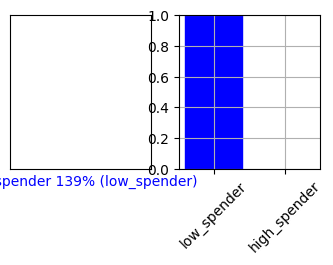

In [29]:
i = 0
# width, height
plt.figure(figsize=(4,2))

# nrows, ncols, index
plt.subplot(1,2,1)
# Create summary plot on left side
plot_image(i, predictions_2_classes, TrainLabelsInt)
# nrows, ncols, index
plt.subplot(1,2,2)
# Create bar plot on right side
plot_value_array(i, predictions_2_classes, TrainLabelsInt)
# Label X axis with classification names
plt.xticks(range(len(predictions_2_classes[0])), class_names, rotation=45)
# Display the graphic
plt.show()
# Blue bar is correct.  If red bar appears, it is the incorrect prediction of the model.

In [30]:
predictions_2_classes[0]


array([ 1.3873048 , -0.49907023], dtype=float32)

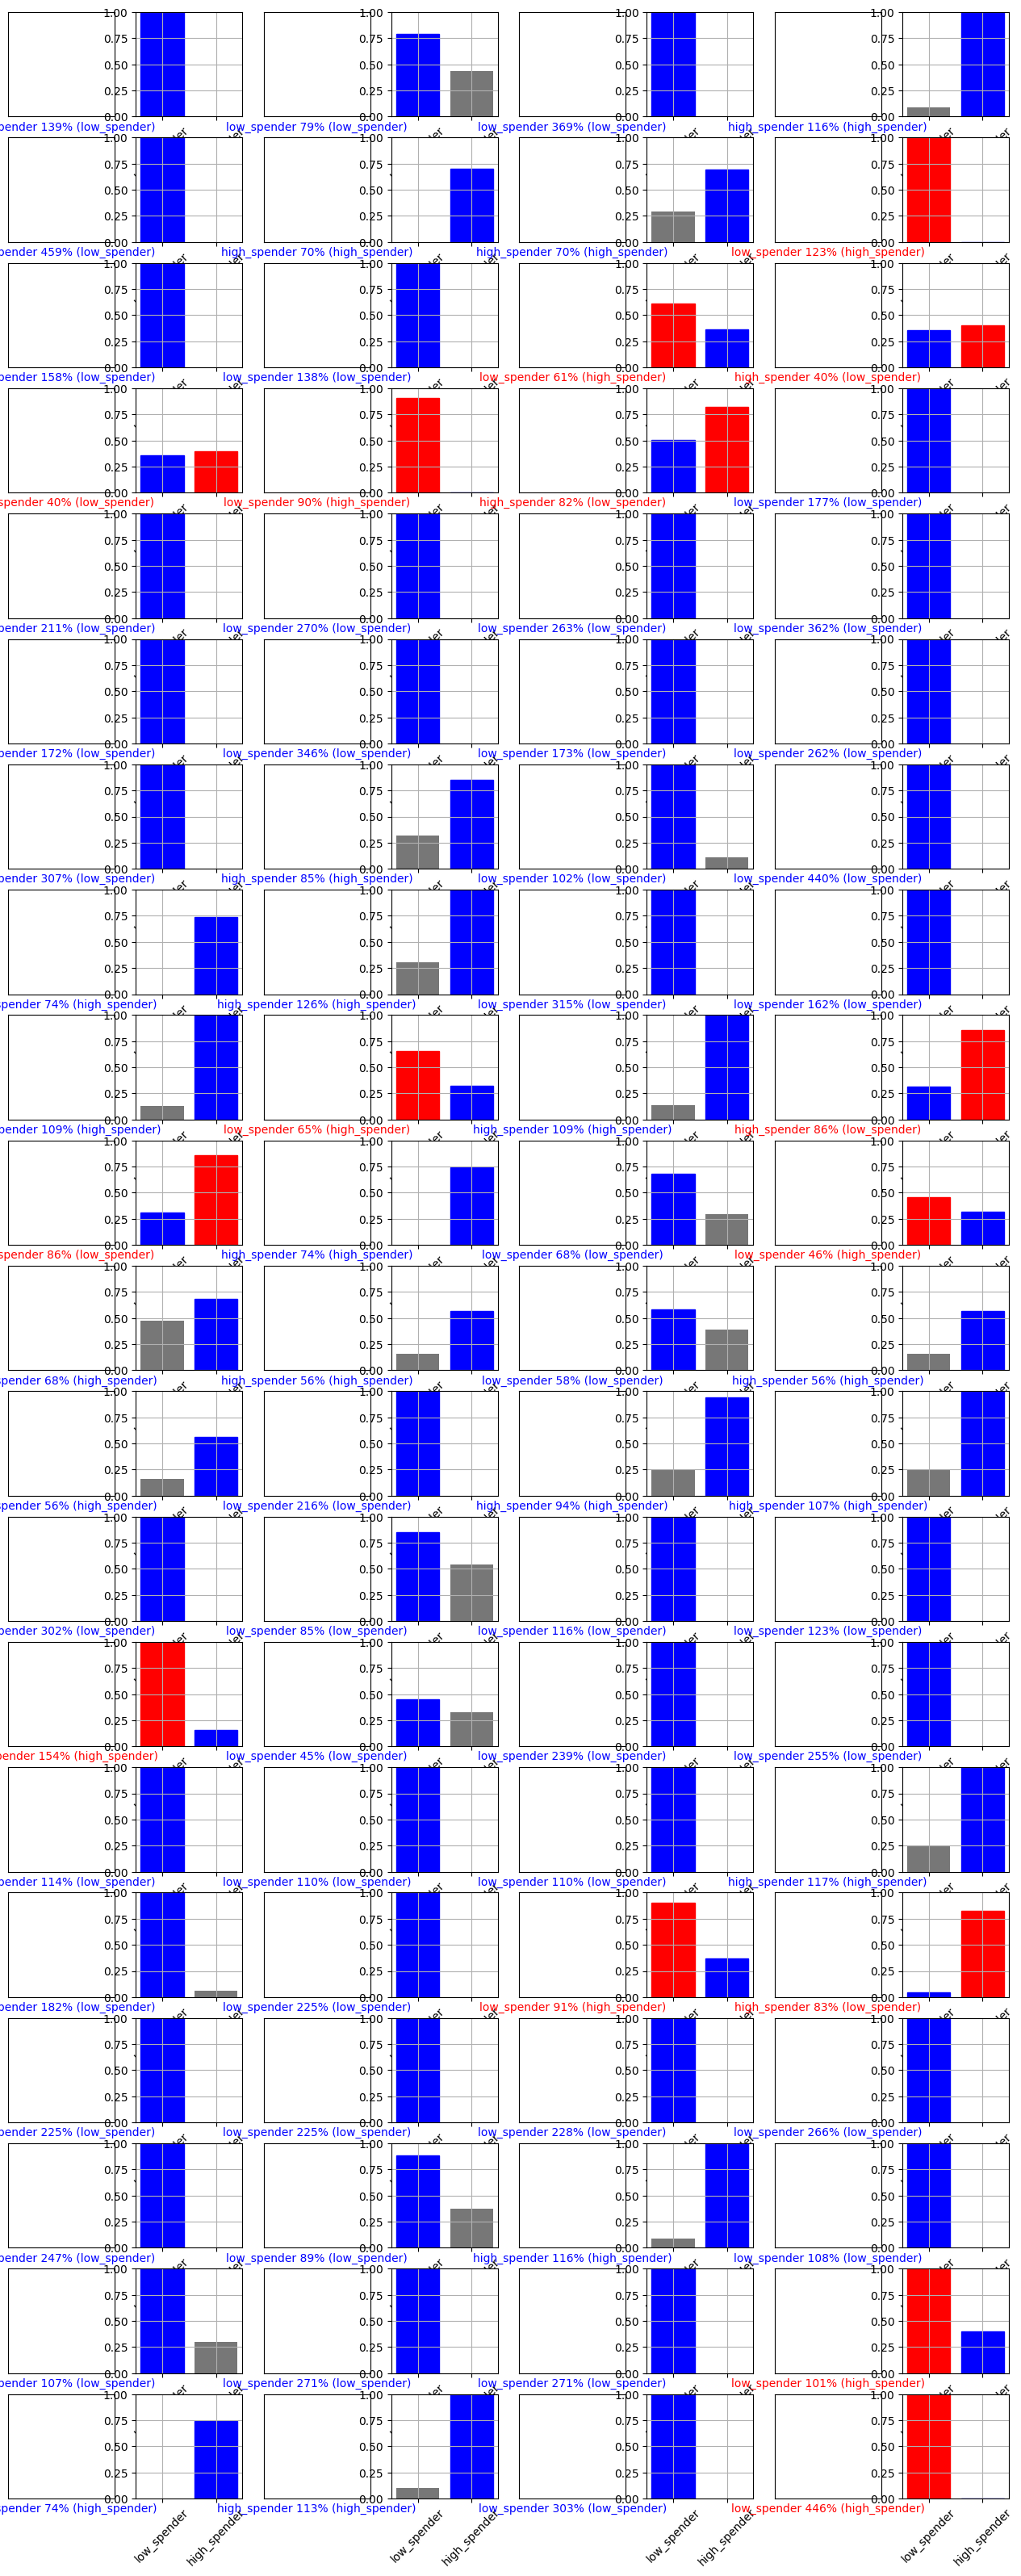

In [31]:
num_rows = 20
num_cols = 4
num_images = num_rows*num_cols
# width, height
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

# Create each plot
for i in range(num_images):
  # nrows, ncols, index
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  # Create summary plot on left side
  plot_image(i, predictions_2_classes, TrainLabelsInt)
  # nrows, ncols, index
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  # Create bar plot on right side
  plot_value_array(i, predictions_2_classes, TrainLabelsInt)
  # Label X axis with classification names
  plt.xticks(range(len(predictions_2_classes[0])), class_names, rotation=45)

# Display the graphic
plt.show()
# Blue bar is correct.  If red bar appears, it is the incorrect prediction of the model.

In [32]:
layer0 = model.get_layer(index=0)


In [33]:
layer0.get_weights()

[]

In [34]:
layer1 = model.get_layer(index=1)

In [35]:
layer1.get_weights()

[array([[ 4.83023636e-02, -9.10934061e-02, -1.50816113e-01,
         -3.30947861e-02, -2.82943510e-02, -2.01044194e-02,
          1.98692605e-01, -3.16015519e-02, -5.10529876e-01,
          1.62286423e-02,  3.24202958e-03,  3.29541922e-01,
         -3.71252862e-03, -1.59891203e-01,  1.40042812e-01,
         -5.24574220e-02,  1.81500420e-01,  2.43952364e-01,
         -1.14184387e-01,  2.65747428e-01,  2.31459644e-03,
         -4.65915352e-02,  2.94705272e-01, -6.07135408e-02,
         -7.44114220e-02, -9.62612778e-03, -1.95284218e-01,
         -1.23163378e-02, -2.66814195e-02,  2.11858094e-01,
         -1.49223909e-01,  2.72746950e-01, -5.01404982e-03,
         -2.07516202e-03,  2.21339628e-01,  6.96452474e-03,
          1.37851313e-01, -8.95138159e-02,  6.64472906e-03,
          2.09767729e-01, -7.30782375e-02,  7.96774924e-02,
         -4.73323204e-02, -5.94978519e-02, -1.58598378e-01,
         -5.15998714e-02, -1.51880253e-02, -8.61755200e-03,
         -1.37623101e-01, -1.60290956e-0

In [36]:
layer2 = model.get_layer(index=2)

In [37]:
layer2.get_weights()

[array([[ 0.11620335,  0.11735506, -0.26036155, ..., -0.3665913 ,
         -0.33670557, -0.38166937],
        [ 0.11099774, -0.02632258, -0.20247155, ...,  0.04634582,
          0.04103038, -0.25763136],
        [ 0.069313  ,  0.19622146, -1.028108  , ..., -0.8744629 ,
         -1.1075712 , -0.9448642 ],
        ...,
        [-0.04025214,  0.19912805, -0.3218012 , ..., -0.47631362,
         -0.4683845 , -0.22104819],
        [ 0.16034305, -0.03926036, -0.6090227 , ..., -0.7578059 ,
         -0.7717998 , -0.6831042 ],
        [ 0.09487886,  0.10966374, -0.15141529, ..., -0.30384672,
         -0.34493163, -0.2503568 ]], dtype=float32),
 array([-0.22422326,  0.57110125, -0.32965982, -0.32531646, -0.3439852 ,
        -0.34062597, -0.3383021 , -0.35045564, -0.3423531 , -0.32718614],
       dtype=float32)]

In [38]:
# Create data frame that contains predictions
predictionsDF = pd.DataFrame(
    data=predictions_2_classes,
    columns=class_names
    )


In [39]:
# Create external file that contains the predictions
predictionsDF.to_csv("Predictions1.csv", encoding='utf-8', header=True, index=False)


In [40]:
# Create one-dimensional array
TrainLabelsInt1D = np.ndarray.copy(TrainLabelsInt[:,0])

# Determine predicted outcomes and whether predicted outcomes equal actual outcomes
PredictedLabels1D   = np.ndarray.copy(TrainLabelsInt1D)
PredictedOutcomes1D = np.ndarray.copy(TrainLabelsInt1D)
for i in range(len(TrainLabelsInt1D)):
    PredictedLabels1D[i] = np.argmax(predictions[i])
    if PredictedLabels1D[i] == TrainLabelsInt1D[i]:
        PredictedOutcomes1D[i] = 1
    else:
        PredictedOutcomes1D[i] = 0

In [41]:
TrainLabelsInt1D

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
PredictedLabels1D

array([0, 0, 0, ..., 1, 1, 0])

In [43]:
PredictedOutcomes1D

array([1, 1, 1, ..., 0, 0, 1])

In [44]:
# Create classification matrix
# The classification matrix columns represent the prediction labels and the rows represent the actual labels
tf.math.confusion_matrix(
    TrainLabelsInt1D,
    PredictedLabels1D,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
    )

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1347,  233],
       [ 167,  468]], dtype=int32)>

In [45]:
# Create classification matrix
# The classification matrix columns represent the prediction labels and the rows represent the actual labels
from sklearn.metrics import confusion_matrix

ClassificationMatrix = confusion_matrix(
    TrainLabelsInt1D,
    PredictedLabels1D
    )
print('Classification Matrix')
print(ClassificationMatrix)

Classification Matrix
[[1347  233]
 [ 167  468]]


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: {:.2f}'.format(accuracy_score(TrainLabelsInt1D, PredictedLabels1D)))

Accuracy: 0.82


In [47]:
# Sensitivity is also called true positive rate (TPR) or recall
print('Sensitivity: {:.2f}'.format(recall_score(TrainLabelsInt1D, PredictedLabels1D, average='micro')))

Sensitivity: 0.82


In [48]:
# Create two-dimensional array
PredictedLabels2D      = np.ndarray.copy(TrainLabelsInt)
PredictedLabels2D[:,0] = np.ndarray.copy(PredictedLabels1D)

PredictedOutcomes2D      = np.ndarray.copy(TrainLabelsInt)
PredictedOutcomes2D[:,0] = np.ndarray.copy(PredictedOutcomes1D)

In [49]:
PredictedLabels1D

array([0, 0, 0, ..., 1, 1, 0])

In [50]:
PredictedLabels2D

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [51]:
PredictedOutcomes1D

array([1, 1, 1, ..., 0, 0, 1])

In [52]:
PredictedOutcomes2D

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [53]:
TrainDataLabels                        = np.append(TrainDataFloat, TrainLabelsInt, axis=1)
TrainDataLabelsPredictions             = np.append(TrainDataLabels, PredictedLabels2D, axis=1)
TrainDataLabelsPredictionsOutcomes     = np.append(TrainDataLabelsPredictions, PredictedOutcomes2D, axis=1)
TrainDataLabelsPredictionsOutcomesProb = np.append(TrainDataLabelsPredictionsOutcomes, predictions_2_classes, axis=1)

In [54]:
# Define header
HeaderNames = ['children','teen','income','marital', 'SpenderClassActual', 'SpenderClassPrediction', 'SpenderClassAccurate',
    'LowSpenderProbability', 'HighSpenderProbability']

# Create data frame
TDLPOP_DF = pd.DataFrame(
    data=TrainDataLabelsPredictionsOutcomesProb,
    columns=HeaderNames
    )

In [55]:
TDLPOP_DF.to_csv("Predictions2.csv", encoding='utf-8', header=True, index=False)
# Updates made upto this point in the program for the new dataset

In [56]:
# Create directory to save model
!mkdir -p Models

In [57]:
# Save model
tf.keras.models.save_model(
    model,
    "Models",
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
    )

In [58]:
# Load saved model
new_model = tf.keras.models.load_model("Models")


In [59]:
# Print summary of original model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 224)               1120      
                                                                 
 dense_3 (Dense)             (None, 10)                2250      
                                                                 
Total params: 3370 (13.16 KB)
Trainable params: 3370 (13.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
# Print summary of loaded model
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 224)               1120      
                                                                 
 dense_3 (Dense)             (None, 10)                2250      
                                                                 
Total params: 3370 (13.16 KB)
Trainable params: 3370 (13.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
#CycNorm, DefNorm, CosNorm
#Each ranges from 0 to 1
SingleObservation = np.array([[1, 0, 0.5,1]])
SingleObservationFloat = SingleObservation.astype(float)

SinglePrediction         = model.predict(SingleObservationFloat)
SinglePredictionNewModel = new_model.predict(SingleObservationFloat)

# Print prediction
print(SinglePrediction[0])
print(SinglePredictionNewModel[0])

1/1 [==============================] - 0s 56ms/step
[-2.03588605e-03  8.33900213e-01 -1.02822485e+01 -1.02727966e+01
 -1.00761671e+01 -1.02740984e+01 -1.00773487e+01 -1.00576000e+01
 -1.01098633e+01 -1.02139883e+01]
[-2.03588605e-03  8.33900213e-01 -1.02822485e+01 -1.02727966e+01
 -1.00761671e+01 -1.02740984e+01 -1.00773487e+01 -1.00576000e+01
 -1.01098633e+01 -1.02139883e+01]


In [62]:
SinglePrediction[0]

array([-2.03588605e-03,  8.33900213e-01, -1.02822485e+01, -1.02727966e+01,
       -1.00761671e+01, -1.02740984e+01, -1.00773487e+01, -1.00576000e+01,
       -1.01098633e+01, -1.02139883e+01], dtype=float32)

In [63]:
SinglePredictionNewModel[0]

array([-2.03588605e-03,  8.33900213e-01, -1.02822485e+01, -1.02727966e+01,
       -1.00761671e+01, -1.02740984e+01, -1.00773487e+01, -1.00576000e+01,
       -1.01098633e+01, -1.02139883e+01], dtype=float32)

In [64]:
np.max(SinglePrediction[0])

0.8339002

In [65]:
np.argmax(SinglePrediction[0])

1

In [66]:
class_names[np.argmax(SinglePrediction[0])]

'high_spender'

In [67]:
!date

Tue Apr 23 10:05:25 PM UTC 2024
